# E-Commerce Data Analysis

Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

Reading the dataset

In [2]:
data = pd.read_csv("sample_food_items_dataset.csv")

In [3]:
data

,ItemID,ProductName,Category,Price,Brand,Supplier,QuantityInStock,ExpirationDate
0,1,Apples,Dairy,12.39,BrandA,SupplierX,374.0,2024-09-07
1,2,Bread,Fruits,13.70,BrandD,SupplierX,22.0,2024-09-11
2,3,Cheese,Bakery,11.36,BrandA,SupplierX,460.0,2024-10-08
3,4,Cheese,Meat,NaN,BrandC,SupplierX,NaN,2024-01-22
4,5,Oranges,Meat,8.81,BrandB,SupplierZ,354.0,2024-08-17
...,...,...,...,...,...,...,...,...
95,96,Bread,Dairy,5.74,BrandA,SupplierY,159.0,2024-04-10
96,97,Milk,Fruits,17.81,BrandD,SupplierZ,81.0,2024-03-31
97,98,Eggs,Fruits,18.23,BrandC,SupplierY,35.0,2024-03-09
98,99,Butter,Meat,13.45,BrandB,SupplierZ,237.0,2024-04-15


##  Data Preprocessing

Shape and info provides the information about the number of observations and features.

In [4]:
data.shape

(100, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ItemID           100 non-null    int64  
 1   ProductName      100 non-null    object 
 2   Category         100 non-null    object 
 3   Price            90 non-null     float64
 4   Brand            100 non-null    object 
 5   Supplier         100 non-null    object 
 6   QuantityInStock  90 non-null     float64
 7   ExpirationDate   100 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 6.4+ KB


Count of unique values in each column

In [6]:
categorical_values =['Category','ProductName','Brand','Supplier']

In [7]:
for col in categorical_values:
    print(data[col].value_counts())
    print("*"*30)

Category
Meat      30
Dairy     26
Bakery    25
Fruits    19
Name: count, dtype: int64
******************************
ProductName
Cheese     15
Butter     14
Apples     11
Bread      11
Oranges    10
Beef       10
Milk        9
Chicken     8
Eggs        7
Bananas     5
Name: count, dtype: int64
******************************
Brand
BrandA    22
BrandE    22
BrandB    21
BrandD    18
BrandC    17
Name: count, dtype: int64
******************************
Supplier
SupplierX    35
SupplierY    35
SupplierZ    30
Name: count, dtype: int64
******************************


##  Standardize the necessary columns

Converting the dtype of ExpirationDate to datetime

In [8]:
data['ExpirationDate'] = pd.to_datetime(data['ExpirationDate'])

In [9]:
print(data['ExpirationDate'])

0    2024-09-07
1    2024-09-11
2    2024-10-08
3    2024-01-22
4    2024-08-17
        ...    
95   2024-04-10
96   2024-03-31
97   2024-03-09
98   2024-04-15
99   2024-01-11
Name: ExpirationDate, Length: 100, dtype: datetime64[ns]


In [10]:
data['Brand'] = data['Brand'].apply(lambda x : x[-1])

In [11]:
data['Brand']

0     A
1     D
2     A
3     C
4     B
     ..
95    A
96    D
97    C
98    B
99    E
Name: Brand, Length: 100, dtype: object

In [12]:
data['Supplier'] = data['Supplier'].apply(lambda x : x[-1])

In [13]:
data['Supplier']

0     X
1     X
2     X
3     X
4     Z
     ..
95    Y
96    Z
97    Y
98    Z
99    Z
Name: Supplier, Length: 100, dtype: object

Checking for null values

In [14]:
data.isnull().sum()

ItemID              0
ProductName         0
Category            0
Price              10
Brand               0
Supplier            0
QuantityInStock    10
ExpirationDate      0
dtype: int64

Handling the missing values

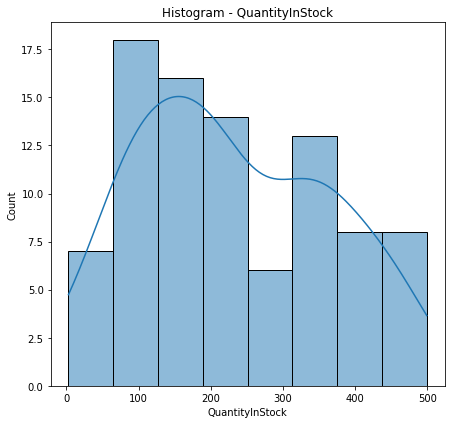

In [15]:
plt.figure(figsize=(12, 6))

# Plot for QuantityInStock
plt.subplot(1, 2, 1)
sns.histplot(data['QuantityInStock'], kde=True)
plt.title('Histogram - QuantityInStock')
plt.tight_layout()
plt.show()


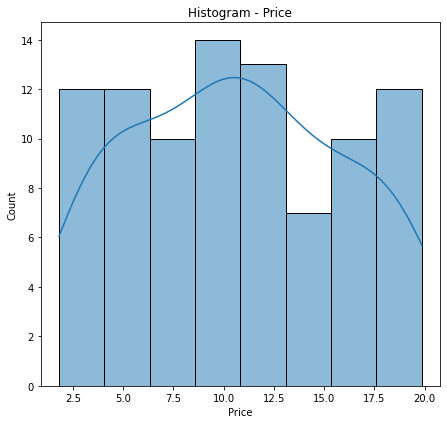

In [16]:
plt.figure(figsize=(12, 6))
# Plot for Price
plt.subplot(1, 2, 2)
sns.histplot(data['Price'], kde=True)
plt.title('Histogram - Price')
plt.tight_layout()
plt.show()

Replacing null values with mean in price column

In [17]:
data['Price'].fillna(data['Price'].mean(), inplace=True)

Replacing null values with median in QuantityInStock column.

In [18]:
data['QuantityInStock'].fillna(data['QuantityInStock'].median(), inplace=True)

In [19]:
data.head(10)

,ItemID,ProductName,Category,Price,Brand,Supplier,QuantityInStock,ExpirationDate
0,1,Apples,Dairy,12.390000,A,X,374.0,2024-09-07
1,2,Bread,Fruits,13.700000,D,X,22.0,2024-09-11
2,3,Cheese,Bakery,11.360000,A,X,460.0,2024-10-08
3,4,Cheese,Meat,10.651111,C,X,214.5,2024-01-22
4,5,Oranges,Meat,8.810000,B,Z,354.0,2024-08-17
5,6,Beef,Fruits,12.950000,A,Y,90.0,2024-06-02
6,7,Cheese,Dairy,10.290000,E,X,51.0,2024-04-29
7,8,Apples,Bakery,10.651111,A,Z,214.5,2024-06-14
8,9,Eggs,Fruits,14.750000,D,X,302.0,2024-07-17
9,10,Butter,Fruits,6.830000,E,Z,208.0,2024-12-12


Rounding of price and QunatityInStock cloumns

In [20]:
data['Price'] = data['Price'].round(2)

In [21]:
data['QuantityInStock'] = data['QuantityInStock'].round(2)

Creating a new column UrgentSale by using a thershold and current date.

In [22]:
data['CurrentDate'] = pd.to_datetime('today')

In [23]:
# Set the threshold for urgent sale (e.g., 30 days)
urgent_sale_threshold = timedelta(days=30)

In [24]:
# Calculate the difference between expiration date and current date
data['DaysUntilExpiration'] = (data['ExpirationDate'] - data['CurrentDate']).dt.days

In [25]:
# Create a new column for urgency of sale (1 for urgent, 0 for not urgent)
data['UrgentSale'] = (data['DaysUntilExpiration'] <= urgent_sale_threshold.days).astype(int)

In [26]:
data

,ItemID,ProductName,Category,Price,Brand,Supplier,QuantityInStock,ExpirationDate,CurrentDate,DaysUntilExpiration,UrgentSale
0,1,Apples,Dairy,12.39,A,X,374.0,2024-09-07,2023-12-28 20:02:10.008292,253,0
1,2,Bread,Fruits,13.70,D,X,22.0,2024-09-11,2023-12-28 20:02:10.008292,257,0
2,3,Cheese,Bakery,11.36,A,X,460.0,2024-10-08,2023-12-28 20:02:10.008292,284,0
3,4,Cheese,Meat,10.65,C,X,214.5,2024-01-22,2023-12-28 20:02:10.008292,24,1
4,5,Oranges,Meat,8.81,B,Z,354.0,2024-08-17,2023-12-28 20:02:10.008292,232,0
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Bread,Dairy,5.74,A,Y,159.0,2024-04-10,2023-12-28 20:02:10.008292,103,0
96,97,Milk,Fruits,17.81,D,Z,81.0,2024-03-31,2023-12-28 20:02:10.008292,93,0
97,98,Eggs,Fruits,18.23,C,Y,35.0,2024-03-09,2023-12-28 20:02:10.008292,71,0
98,99,Butter,Meat,13.45,B,Z,237.0,2024-04-15,2023-12-28 20:02:10.008292,108,0


In [27]:
# Dropping the intermediate columns 
data.drop(['CurrentDate'], axis=1, inplace=True)

Creating a new column TotalCost

In [28]:
data['TotalCost'] = (data['QuantityInStock'] * data['Price']).round(2)

In [29]:
data

,ItemID,ProductName,Category,Price,Brand,Supplier,QuantityInStock,ExpirationDate,DaysUntilExpiration,UrgentSale,TotalCost
0,1,Apples,Dairy,12.39,A,X,374.0,2024-09-07,253,0,4633.86
1,2,Bread,Fruits,13.70,D,X,22.0,2024-09-11,257,0,301.40
2,3,Cheese,Bakery,11.36,A,X,460.0,2024-10-08,284,0,5225.60
3,4,Cheese,Meat,10.65,C,X,214.5,2024-01-22,24,1,2284.43
4,5,Oranges,Meat,8.81,B,Z,354.0,2024-08-17,232,0,3118.74
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Bread,Dairy,5.74,A,Y,159.0,2024-04-10,103,0,912.66
96,97,Milk,Fruits,17.81,D,Z,81.0,2024-03-31,93,0,1442.61
97,98,Eggs,Fruits,18.23,C,Y,35.0,2024-03-09,71,0,638.05
98,99,Butter,Meat,13.45,B,Z,237.0,2024-04-15,108,0,3187.65


## Data Visualization

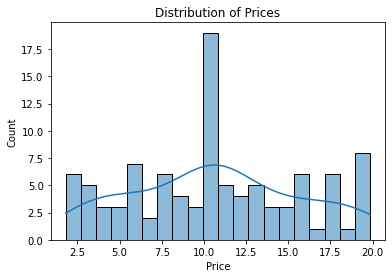

In [30]:
#Distribution of Prices:
sns.histplot(data['Price'], bins=20, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.show()

UrgentSale
0    94
1     6
Name: count, dtype: int64


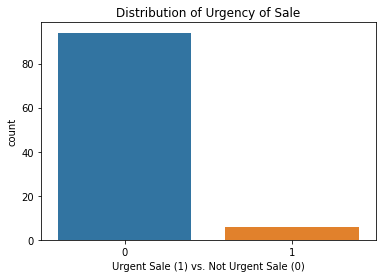

In [31]:
# Urgency of Sale Distribution:
print(data['UrgentSale'].value_counts())
sns.countplot(x='UrgentSale', data=data)
plt.title('Distribution of Urgency of Sale')
plt.xlabel('Urgent Sale (1) vs. Not Urgent Sale (0)')
plt.show()

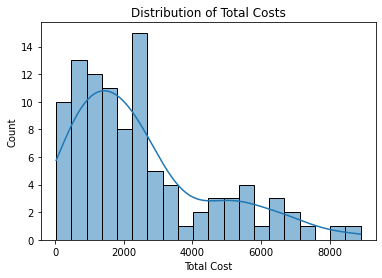

In [32]:
#Total Cost Distribution:
sns.histplot(data['TotalCost'], bins=20, kde=True)
plt.title('Distribution of Total Costs')
plt.xlabel('Total Cost')
plt.show()

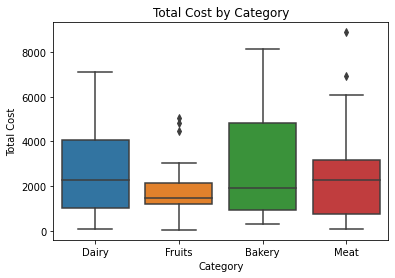

In [33]:
#Boxplot for Total Cost by Category:
sns.boxplot(x='Category', y='TotalCost', data=data)
plt.title('Total Cost by Category')
plt.xlabel('Category')
plt.ylabel('Total Cost')
plt.show()

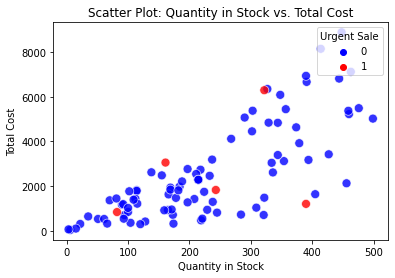

In [35]:
#Scatter Plot for Quantity in Stock vs. Total Cost:
# Use a color palette with different colors for Urgent and Not Urgent sales
palette = {0: 'blue', 1: 'red'}

sns.scatterplot(x='QuantityInStock', y='TotalCost', hue='UrgentSale', palette=palette, data=data, s=80, alpha=0.8)
plt.title('Scatter Plot: Quantity in Stock vs. Total Cost')
plt.xlabel('Quantity in Stock')
plt.ylabel('Total Cost')
plt.legend(title='Urgent Sale', loc='upper right')
plt.show()

In [36]:
data.to_csv('food_items_dataset.csv', index = False)